# Bike Sharing Assignment


# Problem Statement
A U.S bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to Corona Pendamic.They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.

2.How well those variables describe the bike demands.

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the day dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
day= pd.read_csv(r"F:\upgrad\Machine Learning\ML1_Assignment\day.csv")

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.shape

(730, 16)

Here we can see that there are 730 rows and 16 columns 
Let's have more information of dataset

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here we can see there is no Null value.
There are some columns such as "instant","dteday","casual","register" which are not in use for the Multiple Linear Regression
as data in this  is not going to predict the demand for sharing bikes.
So,We have to drop this columns.

In [7]:
remove=["instant","dteday","casual","registered"]
print(remove)

['instant', 'dteday', 'casual', 'registered']


In [8]:
day= day.drop(remove,axis=1)

In [9]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


We can see from dataset Characteristics

There are some categorical Variables:-season,yr,mnth,holiday,weekday,workingday,weathersit

There are some Numerical Variables :-temp,atemp,hum,windspeed,cnt

Before Visualing the Categorical data we need to label them in dataframe

In [10]:
day["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
categorical={"season":{1:"spring",2:"summer",3:"fall",4:"winter"},
                    "yr":{0:"2018yr",1:"2019yr"},
                    "mnth":{1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},
                     "weekday":{0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat"},
                      "weathersit":{1:"Clear",2:"Mist",3:"Light snow",4:"heavy Rain"}
            }
day.replace(categorical,inplace=True)
day.head()
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#+ weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018yr,January,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018yr,January,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018yr,January,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018yr,January,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018yr,January,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

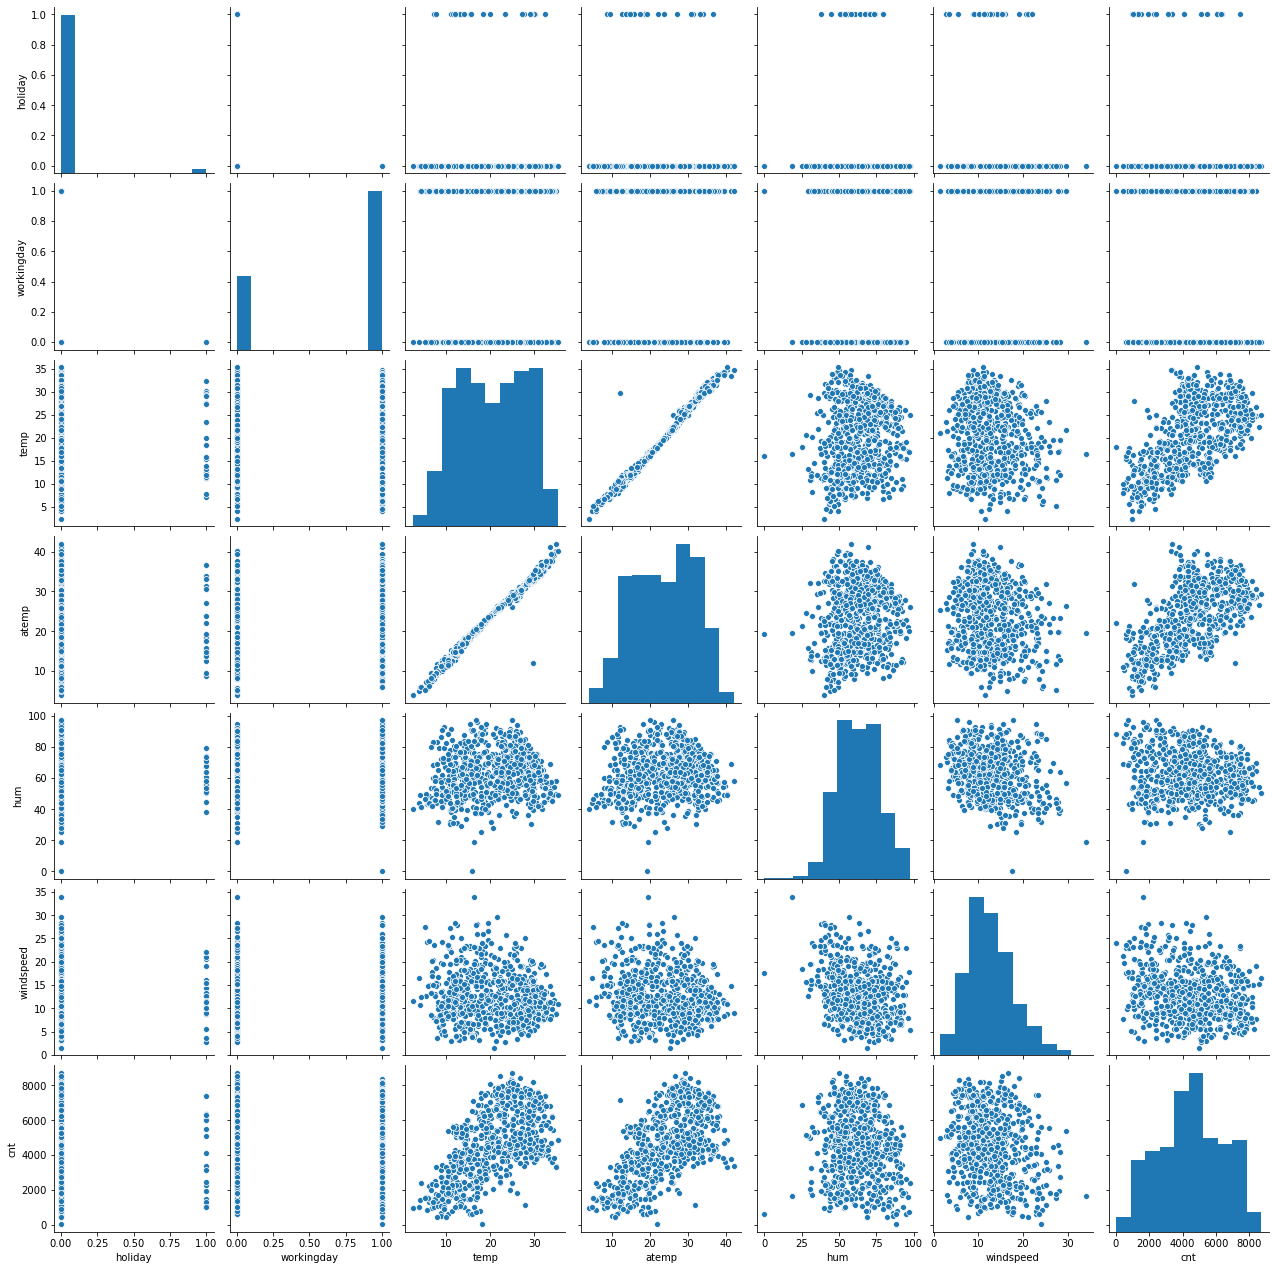

In [13]:
sns.pairplot(day)
plt.show()

Visualising Categorical Variables
Let's make a boxplot for some of these variables.

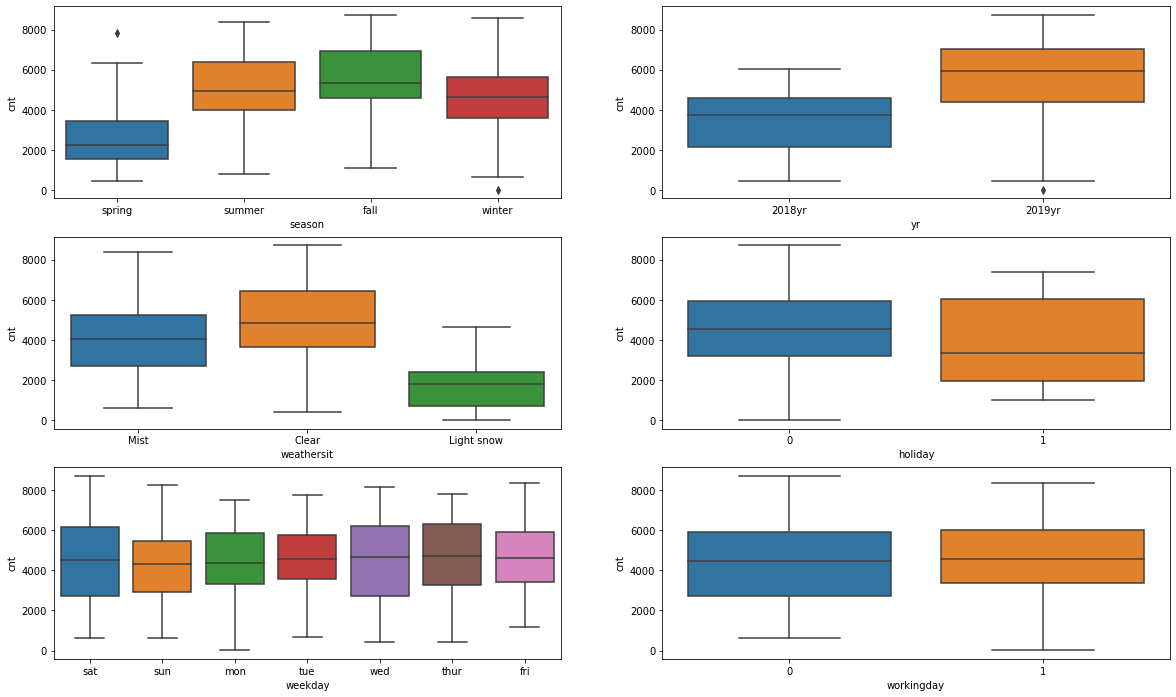

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

From this boxplot we can analyse:-

1.There is change in cnt with the change in season.

2.We can see with the year after year their is increase in demand of rental bike count.

3.Also weathersit affects cnt.

4.Their is slighty change in cnt when there is holiday .

5.Weekdays and workingday didnt shows much variation in cnt.

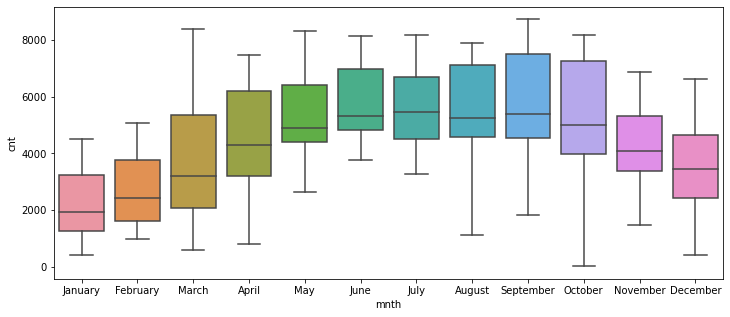

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.show()

There is variation in cnt with the month but we have to see it's dependency with the independent variable also.

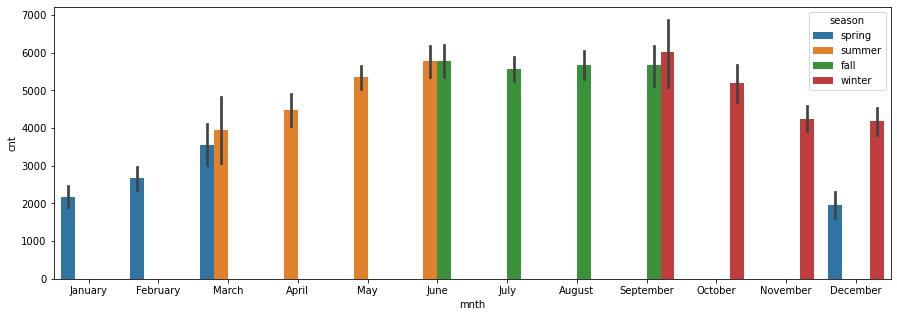

In [16]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'mnth', y = 'cnt', hue = 'season', data = day)
plt.show()

From this bar plot we can see months and season are  dependent  on each other .We have to keep it in mind during multible linear regression.

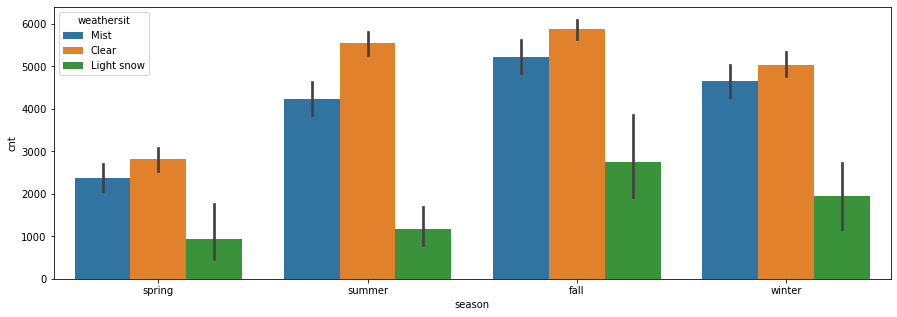

In [17]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'season', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

Their is correlation between weathersit and season  .

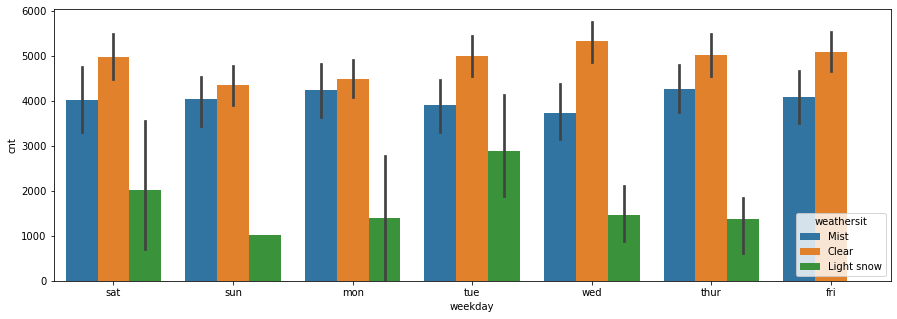

In [18]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'weekday', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

With the change in weekday their is not much change in count of bike_sharing also with the weathsit.No strong correlation between cnt and weekday.

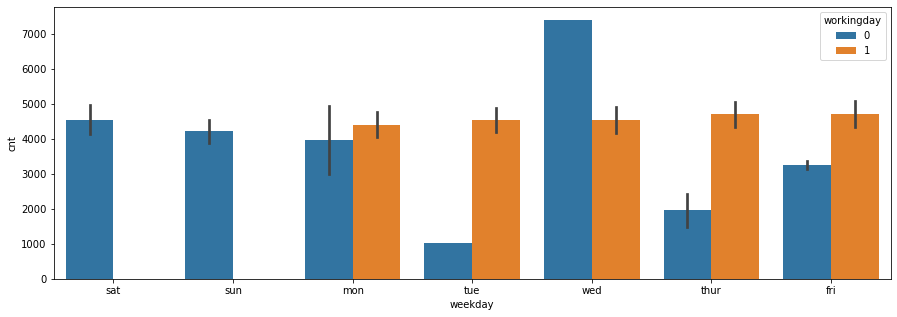

In [19]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = day)
plt.show()

Athough working days are not affecting the count but their is correlation between weekdays and working day lets see how much it affects the other variable.

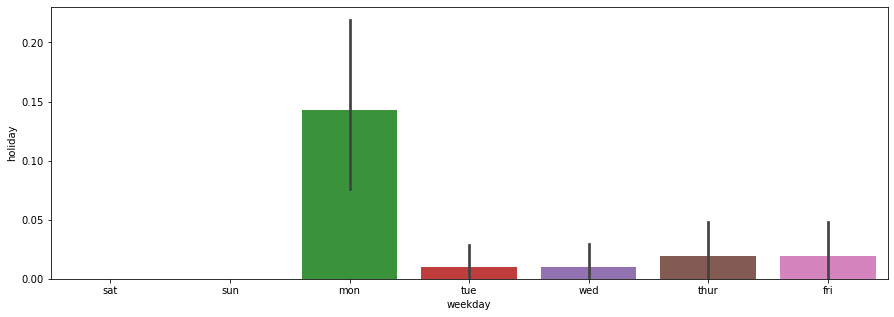

In [20]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'weekday', y = 'holiday', data = day)
plt.show()

Two independent variable holiday and weekday have some relation .

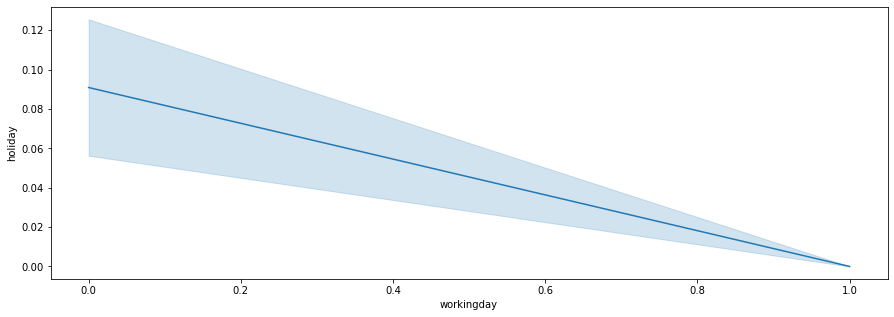

In [21]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'workingday', y = 'holiday', data = day)
plt.show()

Independent variables workingday and holiday have negative correlation.Will be helpful while analysising MLR.

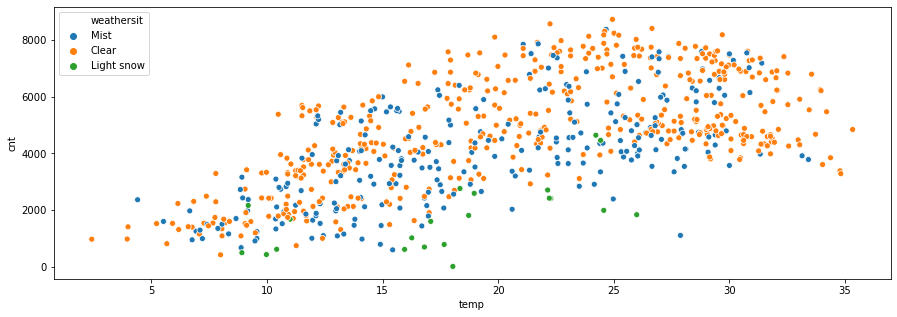

In [22]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'temp', y = 'cnt', hue='weathersit', data = day)
plt.show()

Dependent variable cnt and independent variable temperature and  weathersit shows positive relation with each other.

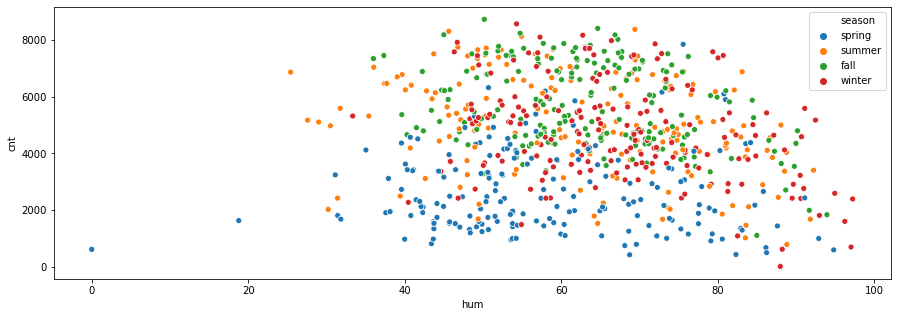

In [23]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'hum', y ='cnt', hue='season',data = day)
plt.show()

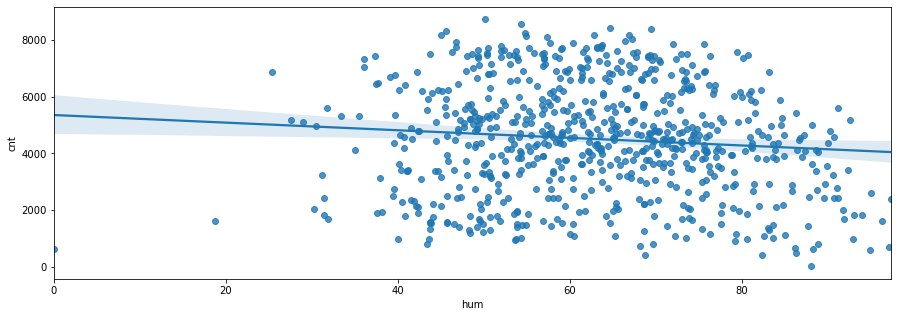

In [24]:
plt.figure(figsize = (15, 5))
sns.regplot(x = 'hum', y = 'cnt', data = day)
plt.show()

Dependent variable cnt and Independent variable shows negative correlation with each other.

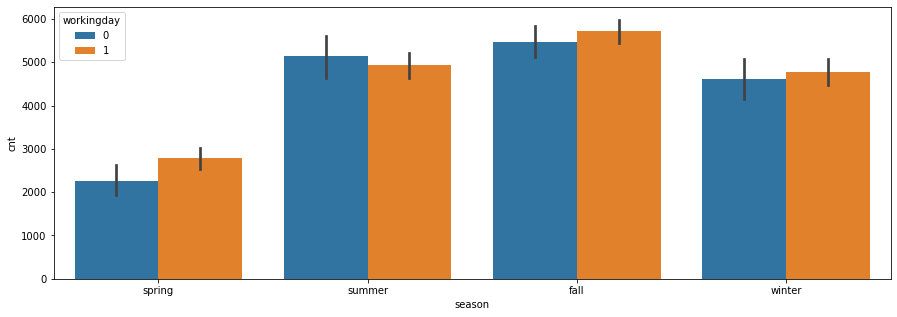

In [25]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'season', y = 'cnt',hue='workingday',data = day)
plt.show()

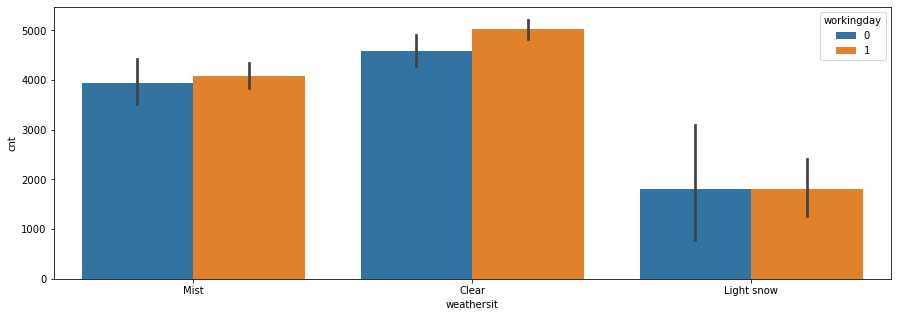

In [26]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'weathersit', y = 'cnt',hue='workingday',data = day)
plt.show()

# Step 3: Data Preparation

### Dummy Variables

The variable such as season,yr,month,weekday,weathersit  have different levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [27]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status1'

status1 = pd.get_dummies(day['season'],drop_first=True)

In [28]:
# Check what the dataset 'status1' looks like
status1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Add the results to the original day dataframe

day=pd.concat([day,status1],axis=1)

In [30]:
# Drop 'season' as we have created the dummies for it

day.drop(['season'], axis = 1, inplace = True)

In [31]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018yr,January,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2018yr,January,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,2018yr,January,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018yr,January,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018yr,January,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [32]:
#Get the dummy variables for the features'yr' and store it in new variable status2
status2=pd.get_dummies(day["yr"],drop_first=True)
# Check what the dataset 'status2' looks like
status2.head()


,2019yr
0,0
1,0
2,0
3,0
4,0


In [33]:
# Add the results to the original day dataframe
day=pd.concat([day,status2],axis=1)
# Drop 'yr' as we have created the dummies for it

day.drop(['yr'], axis = 1, inplace = True)
day.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019yr
0,January,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,January,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,January,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,January,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,January,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [34]:
#Get the dummy variables for the features'mnth' and store it in new variable status3
status3=pd.get_dummies(day["mnth"],drop_first=True)
# Check what the dataset 'status3' looks like
status3.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
# Add the results to the original day dataframe
day=pd.concat([day,status3],axis=1)

# Drop 'mnth' as we have created the dummies for it
day.drop(['mnth'], axis = 1, inplace = True)
day.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,December,February,January,July,June,March,May,November,October,September
0,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
#Get the dummy variables for the features'weekday' and store it in new variable status4
status4=pd.get_dummies(day["weekday"],drop_first=True)
# Check what the dataset 'status4' looks like
status4.head()

,mon,sat,sun,thur,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [37]:
# Add the results to the original day dataframe
day=pd.concat([day,status4],axis=1)
# Drop 'weekday' as we have created the dummies for it

day.drop(['weekday'], axis = 1, inplace = True)
day.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,mon,sat,sun,thur,tue,wed
0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
#Get the dummy variables for the features'weathersit' and store it in new variable status5
status5=pd.get_dummies(day["weathersit"],drop_first=True)
# Check what the dataset 'status5' looks like
status5.head()

,Light snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [39]:
# Add the results to the original day dataframe
day=pd.concat([day,status5],axis=1)
# Drop 'weathersit' as we have created the dummies for it

day.drop(['weathersit'], axis = 1, inplace = True)
day.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  2019yr      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

Now we have 730 rows and 30columns.

# 4.Splitting the data into train-test set

## Initial Steps

Before model building,We need to perform the test-train split and then scale the features.

For splitting into train and test set we have to use sklearn library

In [41]:
#importing sklearn library
import sklearn
from sklearn.model_selection import train_test_split

In [42]:
df_train,df_test=train_test_split(day,train_size=0.7,random_state=100)#spliting the test-train 

In [43]:
print(df_train.shape)

(510, 30)


In [44]:
print(df_test.shape)

(220, 30)


Now we have to rescale the variables so that we can compare them in one scale.
Here we are using Min-Max Scaling.

In [45]:
#importing sklearn library for min max scaling
from sklearn.preprocessing import MinMaxScaler

In [46]:
#Creating an object
scaler = MinMaxScaler()

In [47]:
#Creating a list of only numeric variable
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [48]:
day.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', '2019yr', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed',
       'Light snow', 'Mist'],
      dtype='object')

In [49]:
#Checking dataframe
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.14480,70.4167,11.083475,7216
426,16.980847,20.67460,62.1250,10.792293,4066
728,10.489153,11.58500,48.3333,23.500518,1796
482,15.443347,18.87520,48.9583,8.708325,4220
111,13.803347,16.09770,72.9583,14.707907,1683
...,...,...,...,...,...
578,30.852500,35.35440,65.9583,8.666718,7261
53,9.091299,12.28585,42.3043,6.305571,1917
350,10.591653,12.46855,56.0833,16.292189,2739
79,17.647835,20.48675,73.7391,19.348461,2077


For training the data we will use fit and transform .

In [50]:
#Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_train.describe()#We can see holiday and workingday are already in 0s and 1s.

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the data

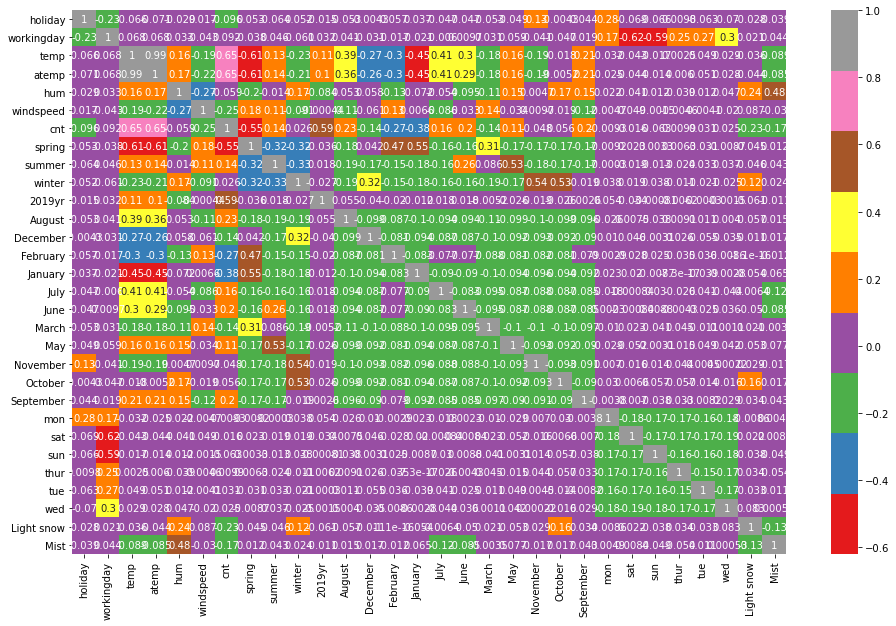

In [52]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Set1")
plt.show()

Here we can see temp and atemp are high correlation with each other.
Our Target variable is cnt (count of total rental bikes including both casual and registered) are mostly coreated with temp positivly and negative corelation with light snow,mist
also have +ve reation with 2019. Weekday are not much co related with depended variable cnt.

In [53]:
correlation=day.corr()
correlation['cnt'].sort_values(ascending=False)

cnt           1.000000
atemp         0.630685
temp          0.627044
2019yr        0.569728
June          0.195568
September     0.194664
August        0.182100
July          0.166236
summer        0.145325
May           0.132553
October       0.108846
winter        0.064619
workingday    0.062542
thur          0.033551
wed           0.014012
sat           0.009012
tue           0.000560
mon          -0.035991
November     -0.040344
sun          -0.059146
holiday      -0.068764
hum          -0.098543
March        -0.128456
Mist         -0.170686
December     -0.173878
windspeed    -0.235132
Light snow   -0.240602
February     -0.273848
January      -0.367167
spring       -0.561702
Name: cnt, dtype: float64

lets Visualise temp with cnt as it is highly corelated

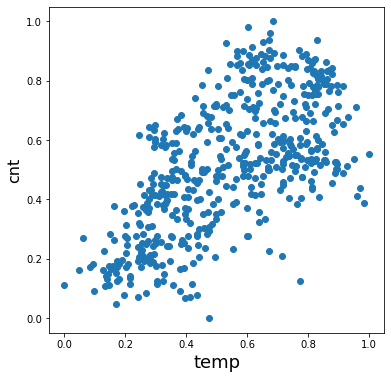

In [54]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp', fontsize = 18)                          # X-label
plt.ylabel('cnt', fontsize = 16)      
plt.show()

# Dividing into X and Y sets for the model building

Let's build the model . We have different choice to build the model 

1.Adding features one by one  with its correlation 

2.Take all the feature then reduce one by one by checking it multicolinearity using (p value and VIF).

3.Automatic Approach then if needed manual approach(RFE).

We will go by Automated Approach(RFE) as well as manual approach.

Our target variable is 'cnt'.

## Dividing into X and Y sets for the model building

In [55]:
y_train = df_train.pop('cnt')
X_train = df_train

# 5.Building a Linear Model

In [56]:
#Adding all the variables to the model
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
print(lr_1.summary())   #Taking all the target variables  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.81e-180
Time:                        02:38:42   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.0

In [58]:
#Let's check for VIF(Variance Inflation Factor)
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,85.56
2,temp,66.90
3,atemp,56.03
22,sat,19.71
23,sun,18.34
6,spring,10.77
8,winter,9.46
7,summer,8.29
18,November,6.79
10,August,6.47


Here we can see workingday,temp,atemp,sat,sun,spring have highest VIF so we can remove it one by one .
Any feature high VIF>5 can be removed,VIF=5 should be inspect,VIF<5 feature should be kept in model.


In [60]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train[['temp','atemp']])#checking for multicolinearity
# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.38e-61
Time:                        02:38:42   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[['temp','atemp']].columns
vif['VIF'] = [variance_inflation_factor(X_train[['temp','atemp']].values, i) for i in range(X_train[['temp','atemp']].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,320.35
1,atemp,320.35


As we can see temp and atemp is highly corelatable with VIF 320 .So,this is the case of multicollinearity .Let's drop atemp.


In [62]:
X_train=X_train.drop('atemp',1)
X_train.head()

,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019yr,August,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 5.1 Model Building

For detailed statistic we are using statsmodel also using Lineaar Regression function from SciKit Learn for RFE.

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:

# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019yr', True, 1),
 ('August', False, 6),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 13),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', False, 4),
 ('thur', False, 9),
 ('tue', False, 8),
 ('wed', False, 10),
 ('Light snow', True, 1),
 ('Mist', True, 1)]

In [66]:
col = X_train.columns[rfe.support_]#create dataset which contains supported variables.
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', '2019yr', 'January', 'July', 'November', 'September', 'sat',
       'Light snow', 'Mist'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'October',
       'mon', 'sun', 'thur', 'tue', 'wed'],
      dtype='object')

In [68]:
# Creating X_test dataframe with RFE selected variables
X_rfe = X_train[col]

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_rfe = sm.add_constant(X_rfe)

In [70]:
lmm = sm.OLS(y_train,X_rfe)  # Running the linear model
lm=lmm.fit()

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.30e-190
Time:                        02:38:43   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2586      0.036      7.096      0.0

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.17
6,spring,5.20
3,temp,3.97
8,winter,3.77
7,summer,2.68
4,hum,1.92
2,workingday,1.88
14,sat,1.78
10,January,1.57
16,Mist,1.57


We have R-squared 0.84 and   adj-R =0.84 which is quite decent model but their is variables 'November' which have high p value let's remove it from model.

In [73]:
X_train=X_rfe.drop("November",1)#dropping 'November'

In [74]:
#Model building 3
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          4.22e-191
Time:                        02:38:44   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
2019yr         0.2305      0.008     28.795      0.000       0.215       0.246
January       -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
September      0.0814      0.016      4.945      0.000       0.049       0.114
sat            0.0536      0.014      3.694      0.000       0.025       0.082
Light snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
6,spring,5.08
3,temp,3.89
8,winter,3.59
7,summer,2.65
4,hum,1.91
2,workingday,1.88
13,sat,1.78
10,January,1.57
15,Mist,1.57


Again model is decent as R-sruared is 0.84 and adj-R is 0.844 but We can see from graphs that January is correated with spring .let's remove January for better Regression.

In [76]:
X_train=X_train.drop('January',1)
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.11e-191
Time:                        02:38:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.000       0.170       0.310
holiday       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday     0.0430      0.012      3.725      0.000       0.020       0.066
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
2019yr         0.2298      0.008     28.647      0.000       0.214       0.246
July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
September      0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0530      0.015      3.648      0.000       0.024       0.082
Light snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist          -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.35
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.62
4,hum,1.91
2,workingday,1.88
12,sat,1.78
14,Mist,1.57
10,July,1.49


In [78]:
X_train=X_train.drop('workingday',1)
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.31e-189
Time:                        02:38:44   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2803      0.035      8.112      0.000       0.212       0.348
holiday       -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp           0.5304      0.034     15.768      0.000       0.464       0.597
hum           -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed     -0.1834      0.026     -7.128      0.000      -0.234      -0.133
spring        -0.0564      0.021     -2.706      0.007      -0.097      -0.015
summer         0.0532      0.015      3.553      0.000       0.024       0.083
winter         0.0972      0.017      5.629      0.000       0.063       0.131
2019yr         0.2298      0.008     28.287      0.000       0.214       0.246
July          -0.0576      0.018     -3.144      0.002      -0.094      -0.022
September      0.0830      0.017      4.963      0.000       0.050       0.116
sat            0.0175      0.011      1.574      0.116      -0.004       0.039
Light snow    -0.2381      0.026     -9.037      0.000      -0.290      -0.186
Mist          -0.0532      0.010     -5.074      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.88
5,spring,5.02
2,temp,3.61
7,winter,3.48
6,summer,2.62
3,hum,1.90
13,Mist,1.56
9,July,1.48
10,September,1.30
12,Light snow,1.24


In [80]:
X_train=X_train.drop('July',1)
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.14e-188
Time:                        02:38:45   Log-Likelihood:                 505.53
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2673      0.035      7.724      0.000       0.199       0.335
holiday       -0.0928      0.026     -3.590      0.000      -0.144      -0.042
temp           0.5142      0.034     15.332      0.000       0.448       0.580
hum           -0.1624      0.038     -4.271      0.000      -0.237      -0.088
windspeed     -0.1821      0.026     -7.017      0.000      -0.233      -0.131
spring        -0.0439      0.021     -2.127      0.034      -0.084      -0.003
summer         0.0701      0.014      4.968      0.000       0.042       0.098
winter         0.1106      0.017      6.547      0.000       0.077       0.144
2019yr         0.2306      0.008     28.147      0.000       0.214       0.247
September      0.0983      0.016      6.092      0.000       0.067       0.130
sat            0.0171      0.011      1.526      0.128      -0.005       0.039
Light snow    -0.2410      0.027     -9.072      0.000      -0.293      -0.189
Mist          -0.0528      0.011     -4.991      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       70.816   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.719
Skew:                          -0.756   Prob(JB):                     2.53e-34
Kurtosis:                       5.235   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.81
5,spring,4.84
2,temp,3.53
7,winter,3.27
6,summer,2.29
3,hum,1.89
12,Mist,1.56
11,Light snow,1.24
4,windspeed,1.19
9,September,1.19


In [82]:
X_train=X_train.drop('sat',1)
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.31e-189
Time:                        02:38:45   Log-Likelihood:                 504.34
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2717      0.035      7.870      0.000       0.204       0.340
holiday       -0.0956      0.026     -3.707      0.000      -0.146      -0.045
temp           0.5137      0.034     15.297      0.000       0.448       0.580
hum           -0.1653      0.038     -4.346      0.000      -0.240      -0.091
windspeed     -0.1809      0.026     -6.965      0.000      -0.232      -0.130
spring        -0.0439      0.021     -2.125      0.034      -0.085      -0.003
summer         0.0699      0.014      4.943      0.000       0.042       0.098
winter         0.1109      0.017      6.556      0.000       0.078       0.144
2019yr         0.2302      0.008     28.073      0.000       0.214       0.246
September      0.0985      0.016      6.096      0.000       0.067       0.130
Light snow    -0.2398      0.027     -9.020      0.000      -0.292      -0.188
Mist          -0.0523      0.011     -4.936      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       64.922   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.438
Skew:                          -0.685   Prob(JB):                     9.64e-33
Kurtosis:                       5.249   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,73.29
5,spring,4.84
2,temp,3.53
7,winter,3.27
6,summer,2.28
3,hum,1.89
11,Mist,1.56
10,Light snow,1.24
4,windspeed,1.19
9,September,1.19


In [84]:
X_train=X_train.drop('September',1)
X_train_lm=sm.add_constant(X_train)
# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          8.27e-183
Time:                        02:38:45   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2932      0.036      8.242      0.000       0.223       0.363
holiday       -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp           0.4960      0.035     14.316      0.000       0.428       0.564
hum           -0.1406      0.039     -3.590      0.000      -0.218      -0.064
windspeed     -0.1830      0.027     -6.802      0.000      -0.236      -0.130
spring        -0.0749      0.021     -3.606      0.000      -0.116      -0.034
summer         0.0432      0.014      3.101      0.002       0.016       0.071
winter         0.0871      0.017      5.110      0.000       0.054       0.121
2019yr         0.2307      0.008     27.176      0.000       0.214       0.247
Light snow    -0.2396      0.028     -8.701      0.000      -0.294      -0.185
Mist          -0.0522      0.011     -4.761      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.53
5,spring,4.55
2,temp,3.50
7,winter,3.10
6,summer,2.07
3,hum,1.87
10,Mist,1.56
9,Light snow,1.24
4,windspeed,1.19
8,2019yr,1.03


Training set in MLR
R-squared is 0.832 which means about 83% predictors in cnt is explained it.
Adj R-squared is approximate equal to R-squared 
p value is less than 0.05 of all the predictors 
So, We can say that this is decent traing set .

# 6.Residual Analysis of train set

Assumption of Linear Regression 

1.Linear relationship between X and y

2.Error terms are normally distributed

3.Error terms are independent of each other

4.Error terms have constant variance.

In [86]:
#Residual is the actual y_train and pred value of y
y_train_pred=lr_8.predict(X_train_lm)


[Text(0.5, 0, 'res'), Text(0.5, 1.0, 'Error Terms')]

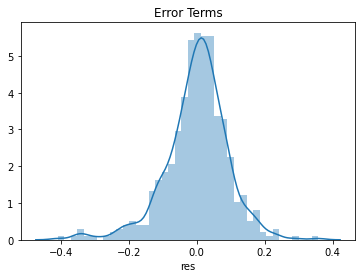

In [87]:
res=y_train-y_train_pred

import seaborn as sns
import matplotlib as plt
b=sns.distplot(res,bins=40)
b.set(xlabel="res",title="Error Terms")

We can see error terms are normally distributed.

Text(0, 0.5, 'res')

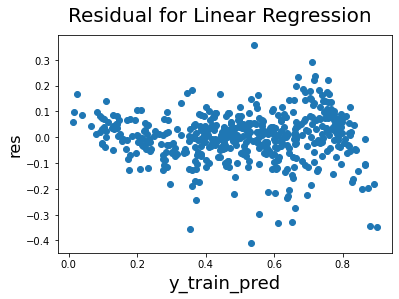

In [88]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(y_train_pred,res)
fig.suptitle('Residual for Linear Regression', fontsize = 20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize = 18)                          # X-label
plt.ylabel('res', fontsize = 16)  

We can see residuals didn't have any distribution pattern and independent variables have mean towards zero.

# 7.Making Predictions Using the Final Model

Applying the scaling on the test sets

In [89]:
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars]

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606
127,21.661653,25.94665,63.1667,5.000712,4333
640,26.957500,29.95665,79.3750,4.458569,7572
72,13.333897,16.60000,49.6957,9.174042,2046


In [90]:
df_test[num_vars] = scaler.transform(df_test[num_vars])#While testing we dont fit the data set only transform 

In [91]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [92]:
y_test = df_test.pop('cnt')
X_test = df_test

In [93]:
# Adding constant variable to test dataframe
X_test_sm= sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,mon,sat,sun,thur,tue,wed,Light snow,Mist
184,1.0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
X_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', '2019yr', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'Light snow',
       'Mist'],
      dtype='object')

In [95]:
X_train.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', '2019yr', 'Light snow', 'Mist'],
      dtype='object')

In [96]:
#Creating X_test_1 dataframe by dropping variables from X_test_1

X_test_sm= X_test_sm.drop(['workingday','atemp','August','December', 'February','January','July','June','March','May','November','October','September','mon','sat','sun','thur','tue','wed'], axis = 1)

In [97]:
X_test_sm.head()

,const,holiday,temp,hum,windspeed,spring,summer,winter,2019yr,Light snow,Mist
184,1.0,1,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1.0,0,0.901354,0.610133,0.153728,0,1,0,1,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,0,1,0,0,1
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0


In [98]:
# Making predictions using the test model
y_pred_test= lr_8.predict(X_test_sm)

# 8: Model Evaluation

[Text(0, 0.5, 'y_pred_test'),
 Text(0.5, 0, 'y_test'),
 Text(0.5, 1.0, 'y_pred_test vs y_test')]

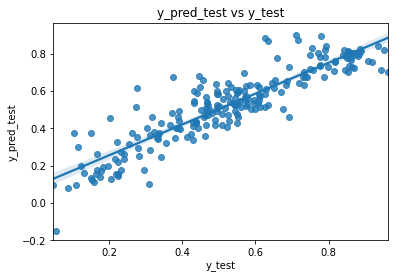

In [99]:
# Plotting y_test and y_pred to understand the spread

a=sns.regplot(y_test, y_pred_test)
a.set(xlabel="y_test",ylabel="y_pred_test",title="y_pred_test vs y_test")

Regression plot shows reglines passes through the point which is linear in nature.

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y_test,y_pred_test)  # R2_Score of y test and y test predicted

0.8068409066288984

We can see 80.68% of the variance in count of rental bikes  is explained by this predictor variables.Which means overall model is decent.

# We can see that the equation of our best fitted line is:

## cnt = 0.2932 + 0.4960 * temp + 0.0432 * summer + 0.0817 * winter + 0.2307 * 2019yr                - 0.086 * holiday- 0.1406 * hum -0.1830 * windspeed - 0.0749 *spring -0.2396 * Light snow -0.0522 * Mist

So, We can say that  seasons (summer,winter,spring),weathersit(fall,Mist,Lightsnow) ,2019 yr,temperature ,humidity and holiday affects the most in counting the number of rental bikes. We can predict the counts of rental bikes by knowing this  predictor factors.